# Sea ice diagnostics

## Load modules and seaice diagnostic

In [1]:
import sys
sys.path.append("../../")
from seaice import SeaIceExtent

## Setup definition

The setup to be included in the diagnostic is defined in the following cell. 
The setup is defined by two variables:
- `mySetups`: a list of dictionaries with model-exp-source combinations to be included in the diagnostic, together with the observational dataset to be used as reference. Additional keyword that can be used are `regrid` if the model output needs to be regridded, `var` if the variable name in the model output is different from the one in the observational dataset, and `"timespan": [beginning, end]` if you want to retrieve only a timespan of the data (under development)
- `myRegions`: a list of regions to be included in the diagnostic. If no list is provided, the diagnostic will be performed on all the available regions.

In [10]:
mySetups = [{"name": "IFS", "experiment": "tco1279-orca025-cycle3", "source": "2D_monthly_native"},
            {"name": "ICON", "experiment": "ngc3028", "source": "lra-r100-monthly"},
            {"name": "IFS", "experiment": "tco2559-ng5-cycle3", "source": "2D_monthly_0.25deg"},
            {"name": "OSI-SAF", "experiment": "osi-450", "source": "nh-monthly"},
            {"name": "OSI-SAF", "experiment": "osi-450", "source": "sh-monthly"}]

# List of regions where SIE has to be calculated
MyRegions = ["Arctic", "Hudson Bay", "Southern Ocean", "Ross Sea", "Weddell Sea",
             "Amundsen-Bellingshausen Seas", "Pacific Ocean", "Indian Ocean"]

config_file = {"models": mySetups, "regions": MyRegions}

In [11]:
print(config_file)

{'models': [{'name': 'IFS', 'experiment': 'tco1279-orca025-cycle3', 'source': '2D_monthly_native'}, {'name': 'ICON', 'experiment': 'ngc3028', 'source': 'lra-r100-monthly'}, {'name': 'IFS', 'experiment': 'tco2559-ng5-cycle3', 'source': '2D_monthly_0.25deg'}, {'name': 'OSI-SAF', 'experiment': 'osi-450', 'source': 'nh-monthly'}, {'name': 'OSI-SAF', 'experiment': 'osi-450', 'source': 'sh-monthly'}], 'regions': ['Arctic', 'Hudson Bay', 'Southern Ocean', 'Ross Sea', 'Weddell Sea', 'Amundsen-Bellingshausen Seas', 'Pacific Ocean', 'Indian Ocean']}


## Class initialization

In [12]:
diagnostic = SeaIceExtent(config_file=config_file)

## Run the diagnostic - run() method

The simplest way to run the diagnostic is to use the `run()` method.
This will compute the diagnostic for each setup and region defined in the previous cell, plot the data and store the netCDF files.

2023-10-11 18:25:40 :: Reader :: WARNING  -> You are asking for var ['ci'] which is already fixed from ['sic'].
2023-10-11 18:25:40 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-10-11 18:25:40 :: Reader :: WARNING  -> You are asking for var ['ci'] which is already fixed from ['sic'].
2023-10-11 18:25:40 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-10-11 18:25:42 :: Seaice :: ERROR    -> Variable ci not found in dataset
2023-10-11 18:25:43 :: Seaice :: ERROR    -> Variable ci not found in dataset
2023-10-11 18:26:19 :: create_folder :: WARNING  -> Creating folder ./pdf/png
2023-10-11 18:26:22 :: create_folder :: WARNING  -> Creating folder ./pdf/pdf
2023-10-11 18:26:26 :: create_folder :: WARNING  -> Creating folder ./netcdf


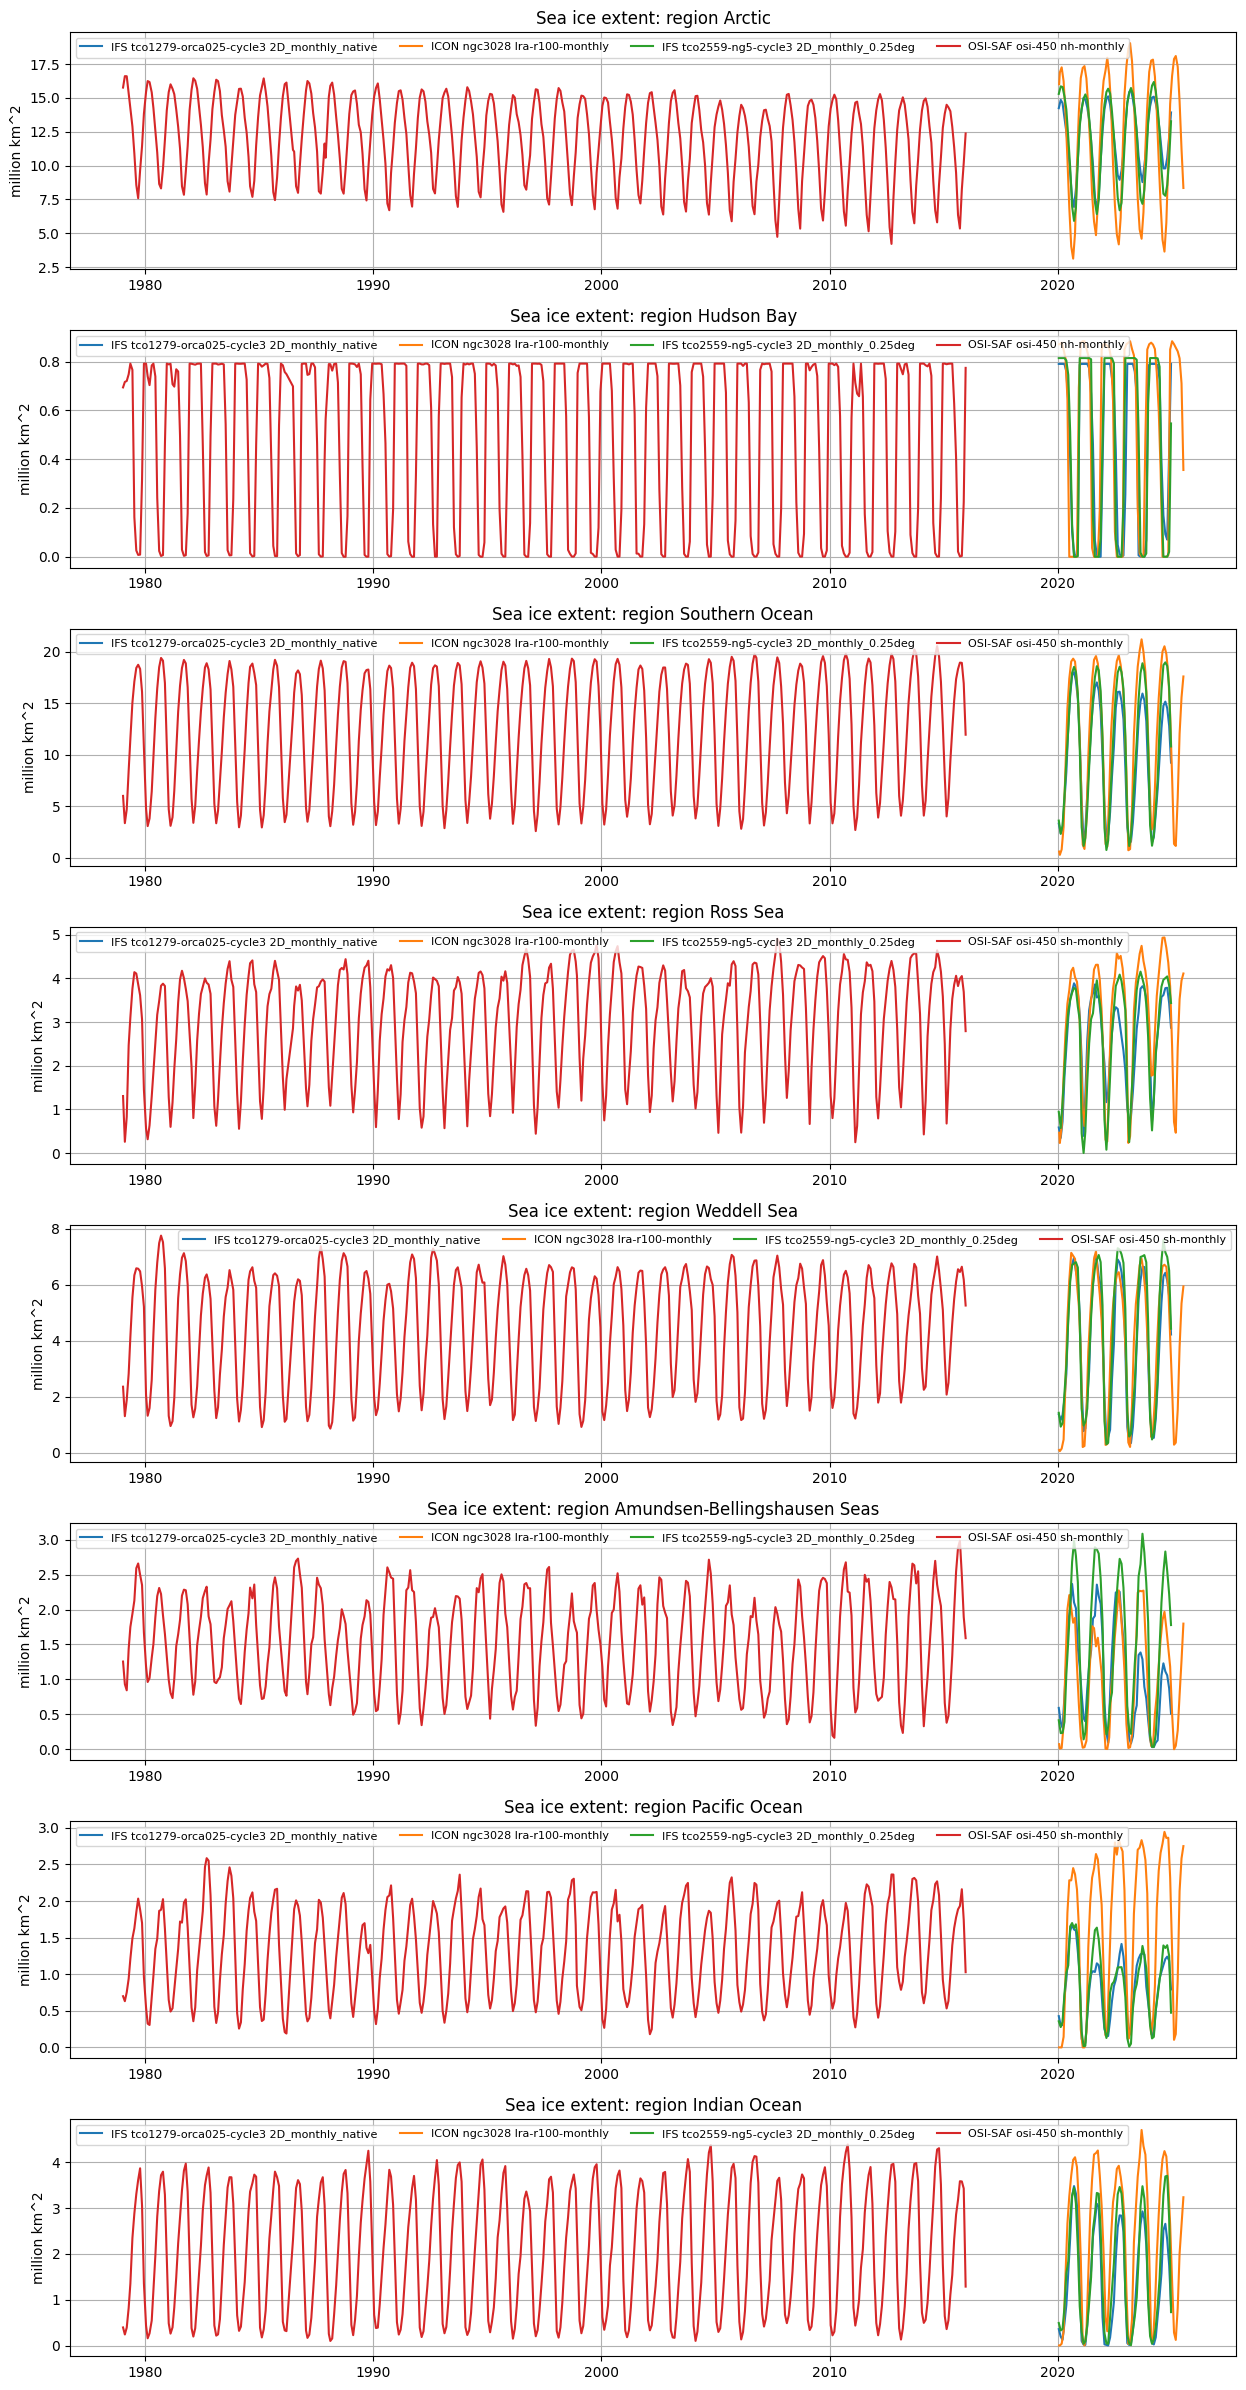

In [13]:
diagnostic.run()

## Methods

The method run() is the simplest way to run the diagnostic, but it is also possible to run the diagnostic step by step.

### 1. computeExtent

In [22]:
diagnostic.computeExtent()

/home/b/b382385/.conda/envs/aqua/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


### 2. plotExtent

2023-07-14 09:30:48 :: create_folder :: WARNING  -> Folder ./PDF/png/ already exists
2023-07-14 09:30:50 :: create_folder :: WARNING  -> Folder ./PDF/pdf/ already exists


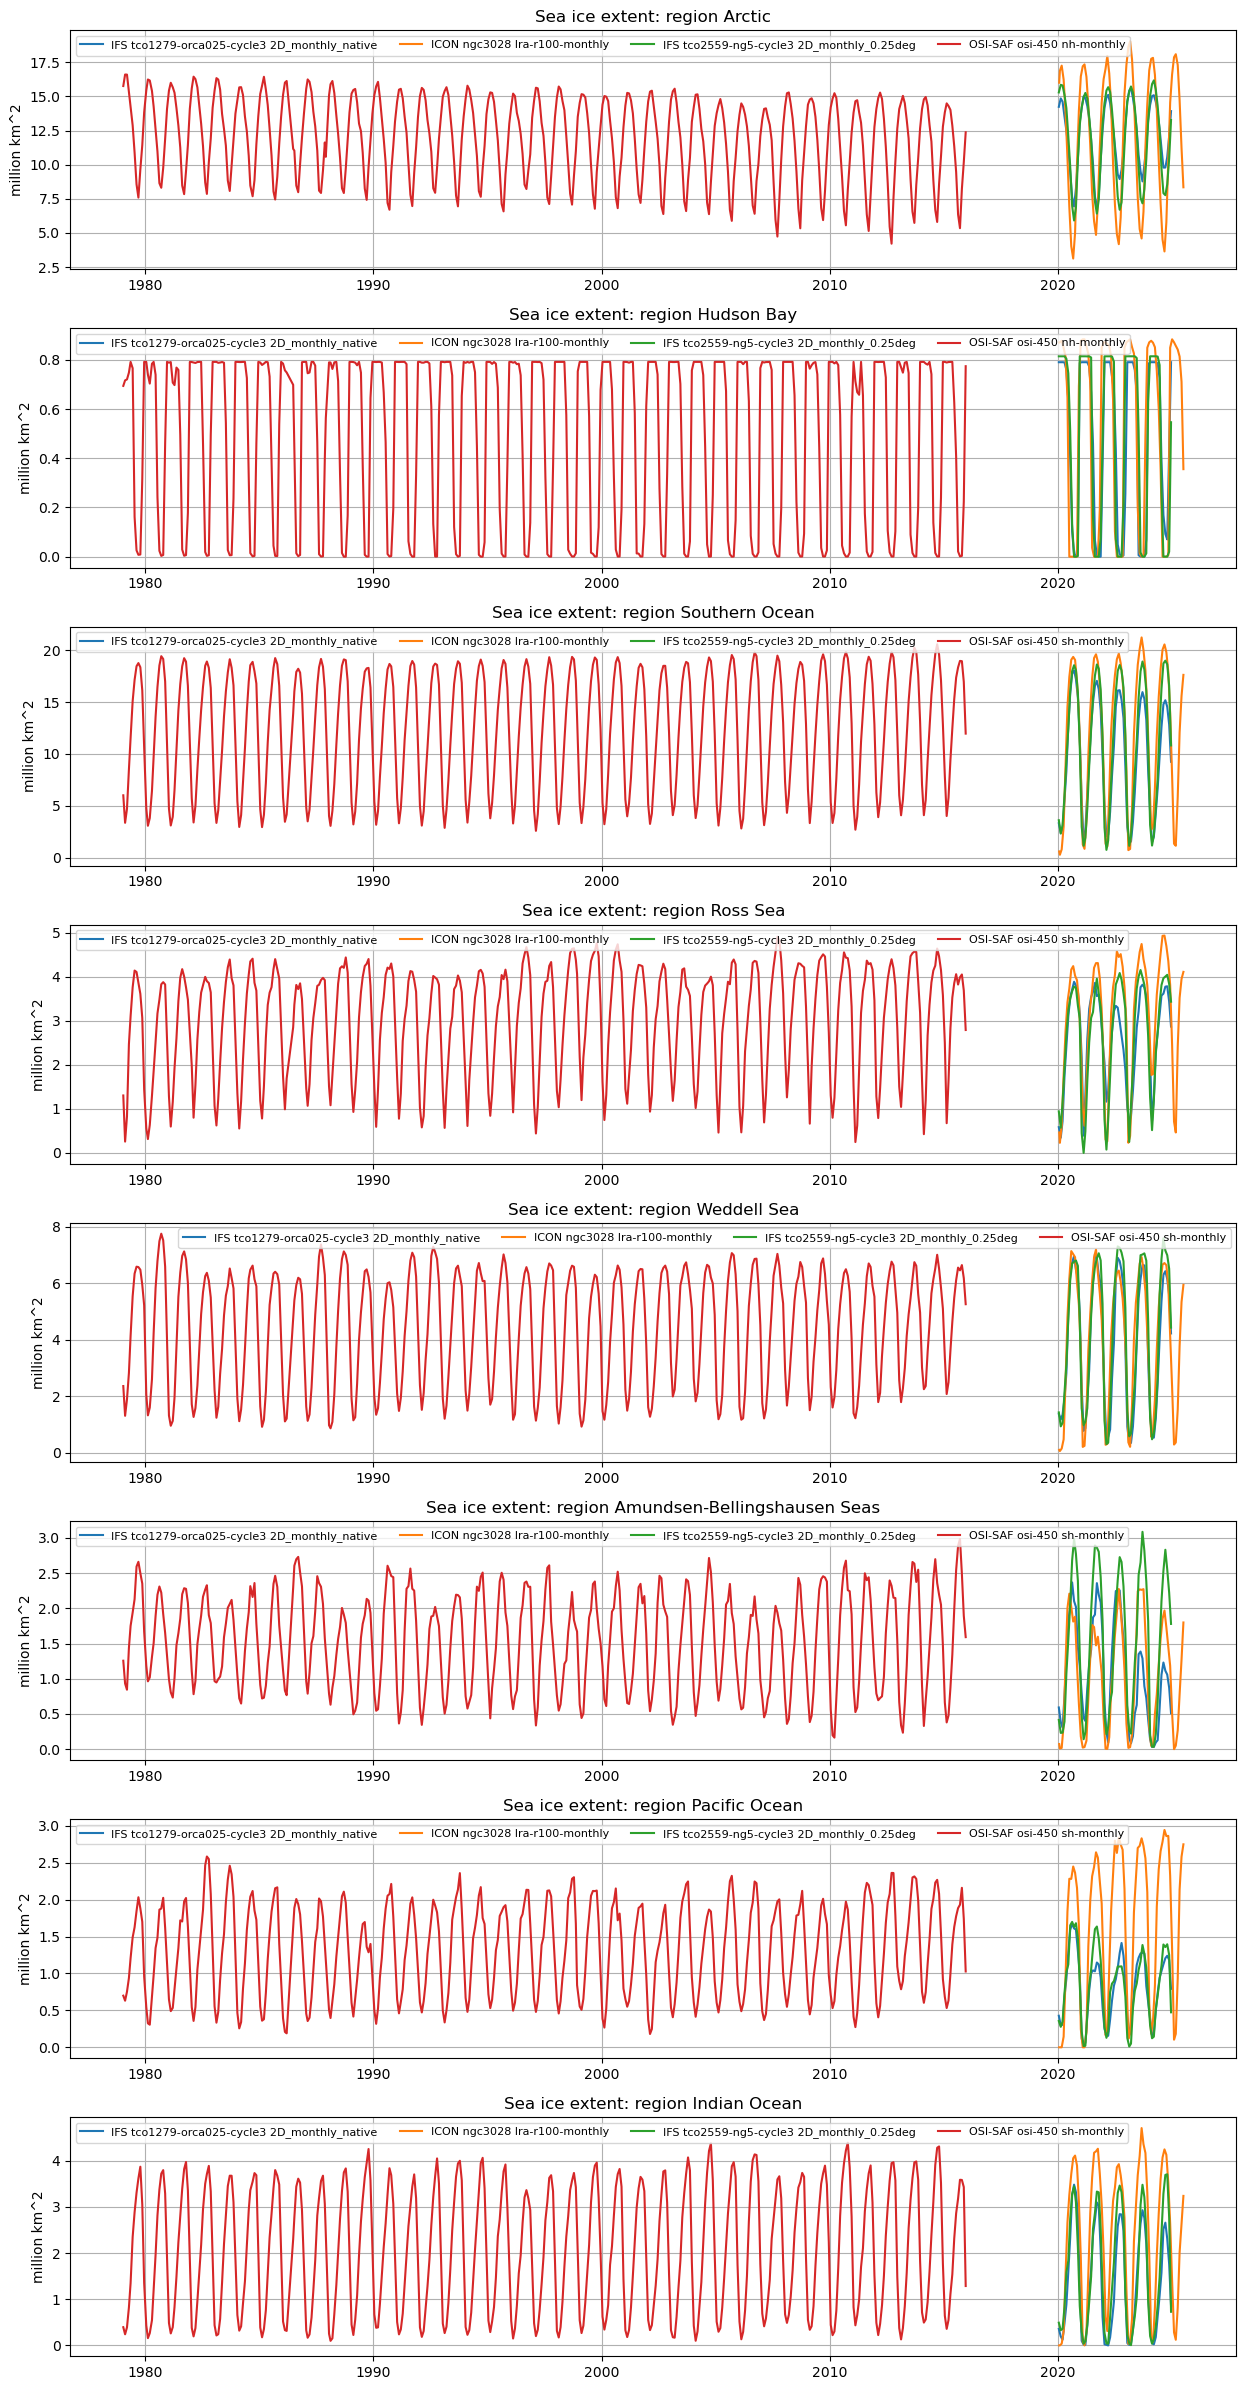

In [23]:
diagnostic.plotExtent()

### 3. createNetCDF

In [24]:
diagnostic.createNetCDF()

2023-07-14 09:30:58 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:01 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:04 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:08 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:14 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:21 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:29 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:38 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:48 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:48 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:48 :: create_folder :: WARNING  -> Folder ./NetCDF/ already exists
2023-07-14 09:31:48 :: create_folder :: WARNING  -> Folder ./NetCDF/ already